In [ ]:
bgfrom google.colab import drive



drive.mount('/content/gdrive/')


Mounted at /content/gdrive/


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans

plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
df = pd.read_csv('gdrive/MyDrive/bacasestudy/housing.csv')
df.head()
X = df.loc[:, [ "latitude", "longitude"]]
X.head()


,latitude,longitude
0,37.88,-122.23
1,37.86,-122.22
2,37.85,-122.24
3,37.85,-122.25
4,37.85,-122.25


In [ ]:
kmeans = KMeans(n_clusters=6)
X["Cluster"] = kmeans.fit_predict(X)
X["Cluster"] = X["Cluster"].astype("category")

X.head()


,latitude,longitude,Cluster
0,37.88,-122.23,0
1,37.86,-122.22,0
2,37.85,-122.24,0
3,37.85,-122.25,0
4,37.85,-122.25,0


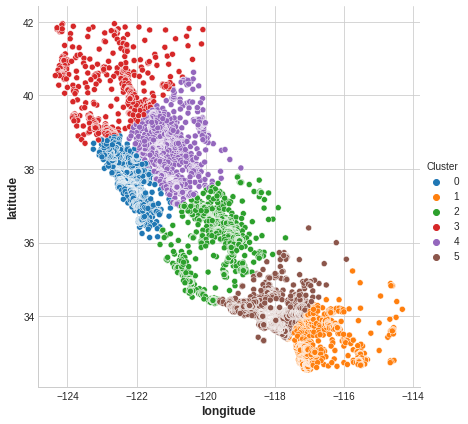

In [ ]:
sns.relplot(
    x="longitude", y="latitude", hue="Cluster", data=X, height=6,
);


Association Rule Mingin

In [ ]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px


try:
    import apyori
except:
    !pip install apyori

from apyori import apriori
def ditribution_plot(x,y,name=None,xaxis=None,yaxis=None):
    fig = go.Figure([
        go.Bar(x=x, y=y)
    ])

    fig.update_layout(
        title_text=name,
        xaxis_title=xaxis,
        yaxis_title=yaxis
    )
    fig.show()

  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5974 sha256=4ab727151e34de171b02649a0c0b6e525724f66bc8e095f0f101f85dc49b6487
  Stored in directory: /root/.cache/pip/wheels/cb/f6/e1/57973c631d27efd1a2f375bd6a83b2a616c4021f24aab84080
Successfully built apyori


In [ ]:
df = pd.read_csv('gdrive/MyDrive/bacasestudy/Groceries_dataset.csv', parse_dates=['Date'])
df.head()
#all products
all_products = df['itemDescription'].unique()
print("Total products: {}".format(len(all_products)))

#One hot representation
one_hot = pd.get_dummies(df['itemDescription'])
df.drop('itemDescription', inplace=True, axis=1)
df = df.join(one_hot)
df.head()



# Transactions¶
# Note: if a customer bought multiple products on same day, We will consider it one transaction


records = df.groupby(["Member_number","Date"])[all_products[:]].apply(sum)
records = records.reset_index()[all_products]



Total products: 167


In [ ]:
## Replacing non-zero values with product names
def get_Pnames(x):
    for product in all_products:
        if x[product] > 0:
            x[product] = product
    return x

records = records.apply(get_Pnames, axis=1)
records.head()


,tropical fruit,whole milk,pip fruit,other vegetables,rolls/buns,pot plants,citrus fruit,beef,frankfurter,chicken,...,flower (seeds),rice,tea,salad dressing,specialty vegetables,pudding powder,ready soups,make up remover,toilet cleaner,preservation products
0,0,whole milk,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,whole milk,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
## Removing zeros
x = records.values
x = [sub[~(sub == 0)].tolist() for sub in x if sub[sub != 0].tolist()]
transactions = x


In [ ]:
rules = apriori(transactions,min_support=0.00030,min_confidance=0.05,min_lift=3,min_length=2,target="rules")
association_results = list(rules)
for item in association_results:

    pair = item[0]
    items = [x for x in pair]
    print("Rule: " + items[0] + " -> " + items[1])

    print("Support: " + str(item[1]))

    print("Confidence: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print("=====================================")



Rule: frozen fish -> specialty chocolate
Support: 0.0003341575887188398
Confidence: 0.049019607843137254
Lift: 3.0689556157190907
Rule: liver loaf -> fruit/vegetable juice
Support: 0.00040098910646260775
Confidence: 0.011787819253438114
Lift: 3.52762278978389
Rule: ham -> pickled vegetables
Support: 0.0005346521419501437
Confidence: 0.03125
Lift: 3.4895055970149254
Rule: meat -> roll products 
Support: 0.0003341575887188398
Confidence: 0.019841269841269844
Lift: 3.620547812620984
Rule: misc. beverages -> salt
Support: 0.0003341575887188398
Confidence: 0.0211864406779661
Lift: 3.5619405827461437
Rule: misc. beverages -> spread cheese
Support: 0.0003341575887188398
Confidence: 0.0211864406779661
Lift: 3.170127118644068
Rule: seasonal products -> soups
Support: 0.0003341575887188398
Confidence: 0.04716981132075471
Lift: 14.704205974842766
Rule: sugar -> spread cheese
Support: 0.00040098910646260775
Confidence: 0.06
Lift: 3.3878490566037733
Rule: butter -> bottled beer
Support: 0.000334157